In [ ]:
#Setup Environment

In [6]:
import Pkg; Pkg.add("FileIO")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [372]:
using Pkg
Pkg.add("IceFloeTracker")
Pkg.add("Images")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
Precompiling project...
   5798.8 ms  ✓ Latexify
   3052.4 ms  ✓ UnitfulLatexify
   3511.3 ms  ✓ Latexify → SparseArraysExt
   3913.2 ms  ✓ Latexify → DataFramesExt
  15362.8 ms  ✓ Plots → UnitfulExt
  5 dependencies successfully precompiled in 29 seconds. 488 already precompiled.
  5 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions. Otherwise, loading dependents of these packages may trigger further precompilation to work with the unexpected versions.
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [373]:
import Pkg; Pkg.add("CSV")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [4]:
import Pkg; Pkg.add(["Dates","Plots"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [5]:
import Pkg; Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [8]:
using IceFloeTracker
using Images
using Images: segment_mean, labels_map, SegmentedImage, RGB
using IceFloeTracker: make_landmask_se, find_ice_labels, imsharpen_gray, normalize_image,
                      discriminate_ice_water, segmentation_A, segmentation_B, segmentation_F,
                      segmented_ice_cloudmasking, watershed_ice_floes, watershed_product
find_ice_mask = find_ice_labels

include("validation_data.jl")
include("segmentation-lopez-acosta-2019.jl")
include("segmentation-lopez-acosta-2019-tiling.jl")

In [135]:
Pkg.add("CairoMakie")

   Resolving package versions...
   Installed SciMLPublic ───────────────── v1.0.0
   Installed GDAL_jll ──────────────────── v303.1100.400+0
   Installed JpegTurbo_jll ─────────────── v3.1.3+0
   Installed Libmount_jll ──────────────── v2.41.2+0
   Installed AxisArrays ────────────────── v0.4.8
   Installed HypergeometricFunctions ───── v0.3.28
   Installed AdaptivePredicates ────────── v1.2.0
   Installed StatsFuns ─────────────────── v1.5.0
   Installed EnumX ─────────────────────── v1.0.5
   Installed Static ────────────────────── v1.3.0
   Installed FFTW ──────────────────────── v1.10.0
   Installed EarCut_jll ────────────────── v2.2.4+0
   Installed SignedDistanceFields ──────── v0.4.0
   Installed PDMats ────────────────────── v0.11.35
   Installed BaseDirs ──────────────────── v1.3.2
   Installed FilePaths ─────────────────── v0.8.3
   Installed TriplotBase ───────────────── v0.1.0
   Installed RoundingEmulator ──────────── v0.2.1
   Installed OpenBLASConsistentFPCSR_jll ─ v0.3

In [139]:
using CairoMakie

[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0] (cache misses: wrong dep version loaded (2))
┌ Warning: Module FFMPEG_jll with build ID fafbfcfd-b4b0-8af0-5acb-56bfac651bca is missing from the cache.
│ This may mean FFMPEG_jll [b22a6f82-2f65-5046-a5b2-351ab43fb4e5] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:2541
┌ Info: Skipping precompilation due to precompilable error. Importing CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
[ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a] (cache misses: wrong dep version loaded (2))
┌ Warning: Module FFMPEG_jll with build ID fafbfcfd-b4b0-8af0-5acb-56bfac651bca is missing from the cache.
│ This may mean FFMPEG_jll [b22a6f82-2f65-5046-a5b2-351ab43fb4e5] does not support precompilation but is imported by a module that does.
└ @ Base loading.j

In [ ]:
#Load Images

In [10]:
data_loader = Watkins2025GitHub(; ref="a451cd5e62a10309a9640fbbe6b32a236fcebc70")

Watkins2025GitHub("a451cd5e62a10309a9640fbbe6b32a236fcebc70", "https://github.com/danielmwatkins/ice_floe_validation_dataset/", "data/validation_dataset/validation_dataset.csv", "/tmp/Watkins2025")

In [11]:
data_loader().metadata

┌ Warning: In /tmp/Watkins2025/a451cd5e62a10309a9640fbbe6b32a236fcebc70/validation_dataset.csv line 381 has 0 fields but 28 fields are expected. Skipping row.
└ @ TextParse ~/.julia/packages/TextParse/bX5Ws/src/csv.jl:390


Row,case_number,region,start_date,center_lon,center_lat,center_x,center_y,month,sea_ice_fraction,mean_sea_ice_concentration,init_case_number,satellite,visible_sea_ice,visible_landfast_ice,visible_floes,visible_water,cloud_fraction_manual,cloud_category_manual,artifacts,qa_analyst,qa_reviewer,fl_analyst,fl_reviewer,psd_file,floe_obscuration,landfast_obscuration,modis_cloud_error,notes
,Int64,String,Date,Float64,Float64,Int64,Int64,Int64,Float64,Float64,Int64,String,String,String,String,Missing,Float64,String,String,String,String,String,String,String,String,String,String,String
1,1,baffin_bay,2022-09-11,-91.5275,77.801,-962500,-912500,9,1.0,0.573,48,terra,yes,no,yes,missing,0.5,thin,yes,daniel,emma,daniel,,yes,heavy,,no,reclassified landfast ice (likely cloud deck)
2,1,baffin_bay,2022-09-11,-91.5275,77.801,-962500,-912500,9,1.0,0.573,48,aqua,yes,no,yes,missing,0.4,thin,yes,ethan,daniel,daniel,,yes,heavy,,no,reclassified landfast ice (likely cloud deck)
3,2,baffin_bay,2015-03-12,-81.9643,76.0579,-912500,-1212500,3,1.0,0.858,24,terra,yes,yes,no,missing,0.2,scattered,no,daniel,emma,,,,,,no,
4,2,baffin_bay,2015-03-12,-81.9643,76.0579,-912500,-1212500,3,1.0,0.858,24,aqua,yes,yes,no,missing,0.2,thin,no,ethan,daniel,,,,,,no,
5,3,baffin_bay,2012-04-19,-79.5793,75.6372,-887500,-1287500,4,1.0,0.873,20,terra,yes,yes,no,missing,0.8,thin,yes,daniel,emma,,,,,heavy,no,
6,3,baffin_bay,2012-04-19,-79.5793,75.6372,-887500,-1287500,4,1.0,0.873,20,aqua,yes,yes,no,missing,0.8,thin,no,ethan,daniel,,,,,heavy,no,
7,4,baffin_bay,2019-09-25,-76.8094,79.3029,-612500,-987500,9,1.0,0.822,33,terra,yes,yes,yes,missing,0.6,scattered,yes,daniel,emma,emma,daniel,yes,moderate,,no,
8,4,baffin_bay,2019-09-25,-76.8094,79.3029,-612500,-987500,9,1.0,0.822,33,aqua,yes,yes,yes,missing,0.8,scattered,yes,ethan,daniel,emma,daniel,yes,light,,no,
9,5,baffin_bay,2013-03-08,-74.8142,78.2037,-637500,-1112500,3,1.0,0.845,22,terra,yes,yes,yes,missing,0.1,scattered,no,daniel,emma,daniel,,yes,light,,no,


In [374]:
#choose case number
cn = 6;

In [282]:
dataset1 = data_loader(c-> c.case_number == cn && c.satellite == "aqua")
case1 = first(dataset1);
dataset2 = data_loader(c-> c.case_number == cn && c.satellite == "terra")
case2 = first(dataset2);
dataset3 = data_loader(c-> c.case_number == cn);

┌ Warning: In /tmp/Watkins2025/a451cd5e62a10309a9640fbbe6b32a236fcebc70/validation_dataset.csv line 381 has 0 fields but 28 fields are expected. Skipping row.
└ @ TextParse ~/.julia/packages/TextParse/bX5Ws/src/csv.jl:390
┌ Warning: In /tmp/Watkins2025/a451cd5e62a10309a9640fbbe6b32a236fcebc70/validation_dataset.csv line 381 has 0 fields but 28 fields are expected. Skipping row.
└ @ TextParse ~/.julia/packages/TextParse/bX5Ws/src/csv.jl:390
┌ Warning: In /tmp/Watkins2025/a451cd5e62a10309a9640fbbe6b32a236fcebc70/validation_dataset.csv line 381 has 0 fields but 28 fields are expected. Skipping row.
└ @ TextParse ~/.julia/packages/TextParse/bX5Ws/src/csv.jl:390


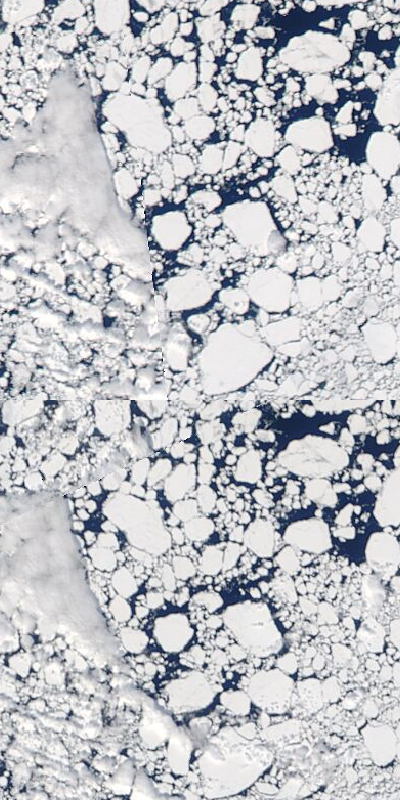

In [375]:
mosaicview(case1.modis_truecolor, case2.modis_truecolor)

In [284]:
truecolor1 = RGB.(case1.modis_truecolor);
truecolor2 = RGB.(case2.modis_truecolor);
mosaicview(truecolor1, truecolor2);

In [285]:
falsecolor1 = RGB.(case1.modis_falsecolor);
falsecolor2 = RGB.(case2.modis_falsecolor);
mosaicview(falsecolor1, falsecolor2);

In [286]:
landmask1 = RGB.(case1.modis_landmask); # TODO: remove RGB cast
landmask2 = RGB.(case2.modis_landmask);
mosaicview(landmask1, landmask2);

In [ ]:
#Segmentation Algorithm

In [287]:
segmentation_algorithm = LopezAcosta2019()

LopezAcosta2019(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

In [288]:
dump(segmentation_algorithm)

LopezAcosta2019
  landmask_structuring_element: Array{Bool}((99, 99)) Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]


In [289]:
segments1 = segmentation_algorithm(truecolor1, falsecolor1, landmask1);
segments2 = segmentation_algorithm(truecolor2, falsecolor2, landmask2);

[ Info: building landmask
[ Info: Building cloudmask
[ Info: Finding ice labels
[ Info: Sharpening truecolor image
[ Info: Normalizing truecolor image
[ Info: Discriminating ice/water
[ Info: Segmenting floes part 1/3
[ Info: Segmenting floes part 2/3
[ Info: Building watersheds
[ Info: Segmenting floes part 3/3
[ Info: Done with k-means segmentation
[ Info: Labeling floes
[ Info: building landmask
[ Info: Building cloudmask
[ Info: Finding ice labels
[ Info: Sharpening truecolor image
[ Info: Normalizing truecolor image
[ Info: Discriminating ice/water
[ Info: Segmenting floes part 1/3
[ Info: Segmenting floes part 2/3
[ Info: Building watersheds
[ Info: Segmenting floes part 3/3
[ Info: Done with k-means segmentation
[ Info: Labeling floes


In [290]:
segmentimg1 = map(i -> segment_mean(segments1, i), labels_map(segments1));
segmentimg2 = map(i -> segment_mean(segments2, i), labels_map(segments2));
mosaicview(segmentimg1, segmentimg2);

In [291]:
# Get the labels_map
segments_falsecolor1 = SegmentedImage(falsecolor1, labels_map(segments1))
segmentfalsecolorimg1 = (map(i -> segment_mean(segments_falsecolor1, i), labels_map(segments_falsecolor1)));
segments_falsecolor2 = SegmentedImage(falsecolor2, labels_map(segments2))
segmentfalsecolorimg2 = (map(i -> segment_mean(segments_falsecolor2, i), labels_map(segments_falsecolor2)));
mosaicview(segmentfalsecolorimg1, segmentfalsecolorimg2);

In [ ]:
#Segmentation with Tiling

In [292]:
binaryimg1 = Gray.(labels_map(segments1) .> 0);
binaryimg2 = Gray.(labels_map(segments2) .> 0);
mosaicview(binaryimg1, binaryimg2);

In [293]:
segmentation_algorithm_with_tiling = LopezAcosta2019Tiling();

In [294]:
dump(segmentation_algorithm_with_tiling);

LopezAcosta2019Tiling
  tile_settings: @NamedTuple{rblocks::Int64, cblocks::Int64}
    rblocks: Int64 2
    cblocks: Int64 2
  cloud_mask_thresholds: @NamedTuple{prelim_threshold::Float64, band_7_threshold::Float64, band_2_threshold::Float64, ratio_lower::Float64, ratio_upper::Float64, r_offset::Float64}
    prelim_threshold: Float64 0.43137254901960786
    band_7_threshold: Float64 0.7843137254901961
    band_2_threshold: Float64 0.7450980392156863
    ratio_lower: Float64 0.0
    ratio_upper: Float64 0.75
    r_offset: Float64 0.0
  adapthisteq_params: @NamedTuple{white_threshold::Float64, entropy_threshold::Int64, white_fraction_threshold::Float64}
    white_threshold: Float64 25.5
    entropy_threshold: Int64 4
    white_fraction_threshold: Float64 0.4
  adjust_gamma_params: @NamedTuple{gamma::Float64, gamma_factor::Float64, gamma_threshold::Int64}
    gamma: Float64 1.5
    gamma_factor: Float64 1.3
    gamma_threshold: Int64 220
  structuring_elements: @NamedTuple{se_disk1::Matri

In [23]:
#Tracking Section

In [295]:
# Functions used to load, view, and extract floe shapes
using IceFloeTracker: load, imshow, label_components, regionprops_table


In [296]:
# Functions for prepping the region props tables, and tracking floes
using IceFloeTracker: addfloemasks!, adduuid!, add_passtimes!, addψs!, long_tracker


In [297]:
using DataFrames, Dates, Plots, CSV

,

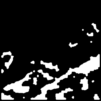
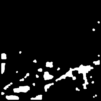

In [298]:
images = [binaryimg1, binaryimg2] 
imshow.(images * 255)

In [ ]:
#Measuring object properties

In [299]:
labeled_images = label_components.(images);

In [300]:
labeled_images = label_components.(images);
props = regionprops_table.(labeled_images);

In [301]:
props[1]

Row,area,min_row,min_col,max_row,max_col,row_centroid,col_centroid,convex_area,major_axis_length,minor_axis_length,orientation,perimeter
,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,516.0,204,4,229,44,215,24,727.0,48.3636,18.1674,-1.27841,116.669
2,134.0,275,4,291,13,283,8,134.0,16.7368,10.4406,0.0,41.799
3,884.0,370,4,397,54,387,24,1023.0,55.2117,23.747,1.32082,143.355
4,3824.0,286,12,371,128,341,76,5589.0,117.569,66.8122,-1.12714,417.262
5,785.0,221,18,274,53,248,35,1023.0,60.4158,20.6371,-0.559143,147.882
6,37.0,386,91,392,97,389,94,37.0,6.83394,6.83394,-0.785398,19.3137
7,148.0,242,121,254,136,248,130,156.0,16.4727,12.0771,-1.4801,45.2132
8,8668.0,215,121,397,397,302,282,16971.0,377.965,51.3046,-1.0405,879.21
9,49.0,280,131,287,138,284,135,49.0,8.26105,7.5204,-0.785398,22.7279


In [302]:
passtimes = collect(Date(2022,5,30):Day(1):Date(2022,5,31)) #add code to connect this with data set from segmentaion?
add_passtimes!(props, passtimes)

In [303]:
adduuid!(props);

In [304]:
addfloemasks!(props, [im .> 0 for im in images]) # Images need to be bitmatrices for the floemasks call.
addψs!(props)

In [305]:
props[1][!, :bdry] = IceFloeTracker.bwtraceboundary.(props[1][!, :mask]);
props[2][!, :bdry] = IceFloeTracker.bwtraceboundary.(props[2][!, :mask]);

,,,,,,,,,,,,,,,,,,,,,,,

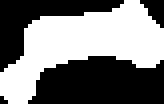
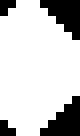
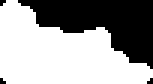
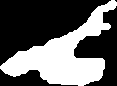
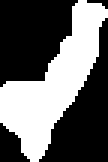
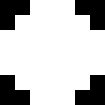
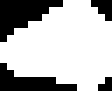
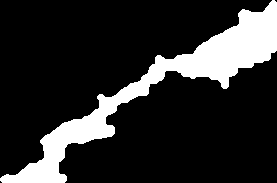
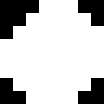
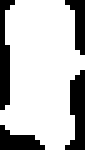
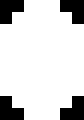
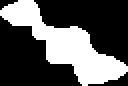
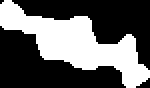
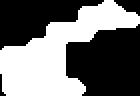
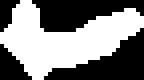
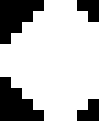
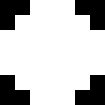
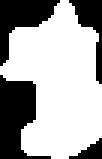
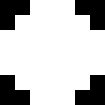
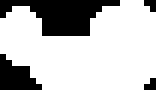
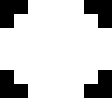
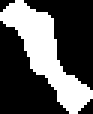
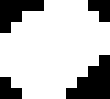
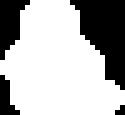

In [306]:
imshow.(props[1].mask)

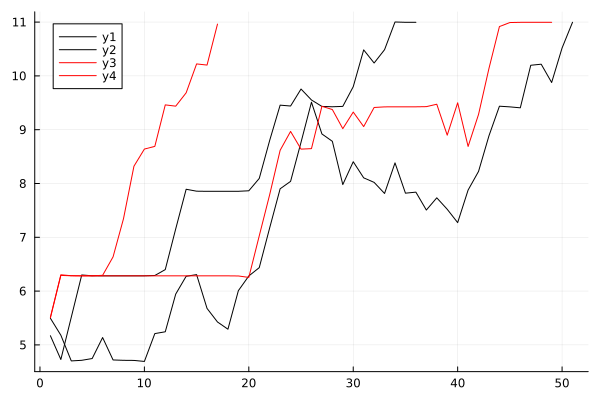

In [307]:
plt = plot([p[1,:psi] for p in props], lc=:black)
plot!([p[2,:psi] for p in props], lc=:red)

In [ ]:
#Tracking

In [248]:
display("text/markdown", @doc long_tracker)

```
long_tracker(props, condition_thresholds, mc_thresholds)
```

Track ice floes over multiple observations.

Trajectories are built as follows:

  * Assume the floes detected in observation 1 are trajectories of length 1.
  * For each subsequent observation:

      * Determine the latest observation for each trajectory – these are the "current trajectory heads".
      * Find matches between the the current trajectory heads and the new observed floes, extending those trajectories.
      * Any unmatched floe in an observation is added as a new trajectory starting point.

# Arguments

  * `props::Vector{DataFrame}`: A vector of DataFrames, each containing ice floe properties for a single day. Each DataFrame must have the following columns:

      * "area"
      * "min_row"
      * "min_col"
      * "max_row"
      * "max_col"
      * "row_centroid"
      * "col_centroid"
      * "convex_area"
      * "major*axis*length"
      * "minor*axis*length"
      * "orientation"
      * "perimeter"
      * "mask": 2D array of booleans
      * "passtime": A timestamp for the floe
      * "psi": the psi-s curve for the floe
      * "uuid": a universally unique identifier for each segmented floe
  * `condition_thresholds`: namedtuple of thresholds for deciding whether to match floe `i` from day `k` to floe j from day `k+1`. See `IceFloeTracker.condition_thresholds` for sample values.
  * `mc_thresholds`: thresholds for area mismatch and psi-s shape correlation. See `IceFloeTracker.mc_thresholds` for sample values.

# Returns

A DataFrame with the above columns, plus extra columns:

  * `area_mismatch` and `corr`, which are the area mismatch and correlation between a floe and the one that preceeds it in the trajectory.
  * `head_uuid`, the floe which was best matched by this floe.
  * Trajectories are identified by: 

      * a unique identifier `ID` and the
      * UUID of the trajectory, `trajectory_uuid`.


In [308]:
ct = IceFloeTracker.condition_thresholds

(search_thresholds = (dt = (30.0, 100.0, 1300.0), dist = (200, 250, 300)), small_floe_settings = (minimumarea = 400, arearatio = 0.18, majaxisratio = 0.1, minaxisratio = 0.15, convexarearatio = 0.2), large_floe_settings = (minimumarea = 1200, arearatio = 0.28, majaxisratio = 0.1, minaxisratio = 0.12, convexarearatio = 0.14))

In [309]:
tracked = long_tracker(props, ct, mc);

In [310]:
track_results = tracked;

In [311]:
nrow(tracked)

2

In [312]:
tg = groupby(tracked, :ID);

,

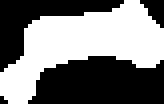
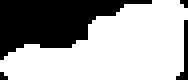

In [313]:
imshow.(tg[1][!,:mask])

In [314]:
imshow.(tg[2][!,:mask])

LoadError: BoundsError: attempt to access 1-element Vector{Int64} at index [2]

In [315]:
plot(tg[1][!, :col_centroid], tg[1][!, :row_centroid], m=:circle, markersize=4, label="Floe 1")
plot!(tg[2][!, :col_centroid], tg[1][!, :row_centroid], m=:circle, markersize=4, label="Floe 2")

LoadError: BoundsError: attempt to access 1-element Vector{Int64} at index [2]

In [316]:
plot(tg[1][!, :passtime], tg[1][!, :orientation], m=:circle, markersize=4, label="Floe 1")
plot!(tg[2][!, :passtime], tg[2][!, :orientation], m=:circle, markersize=4, label="Floe 2")

LoadError: BoundsError: attempt to access 1-element Vector{Int64} at index [2]

In [317]:
data_columns = [n for n in names(tracked) if n ∉ ["mask", "psi"]];
CSV.write("example_tracked_floes.csv", tracked[!, data_columns]);

In [318]:
# force Jupyter to use PNG to speed up plotting
CairoMakie.enable_only_mime!("png")

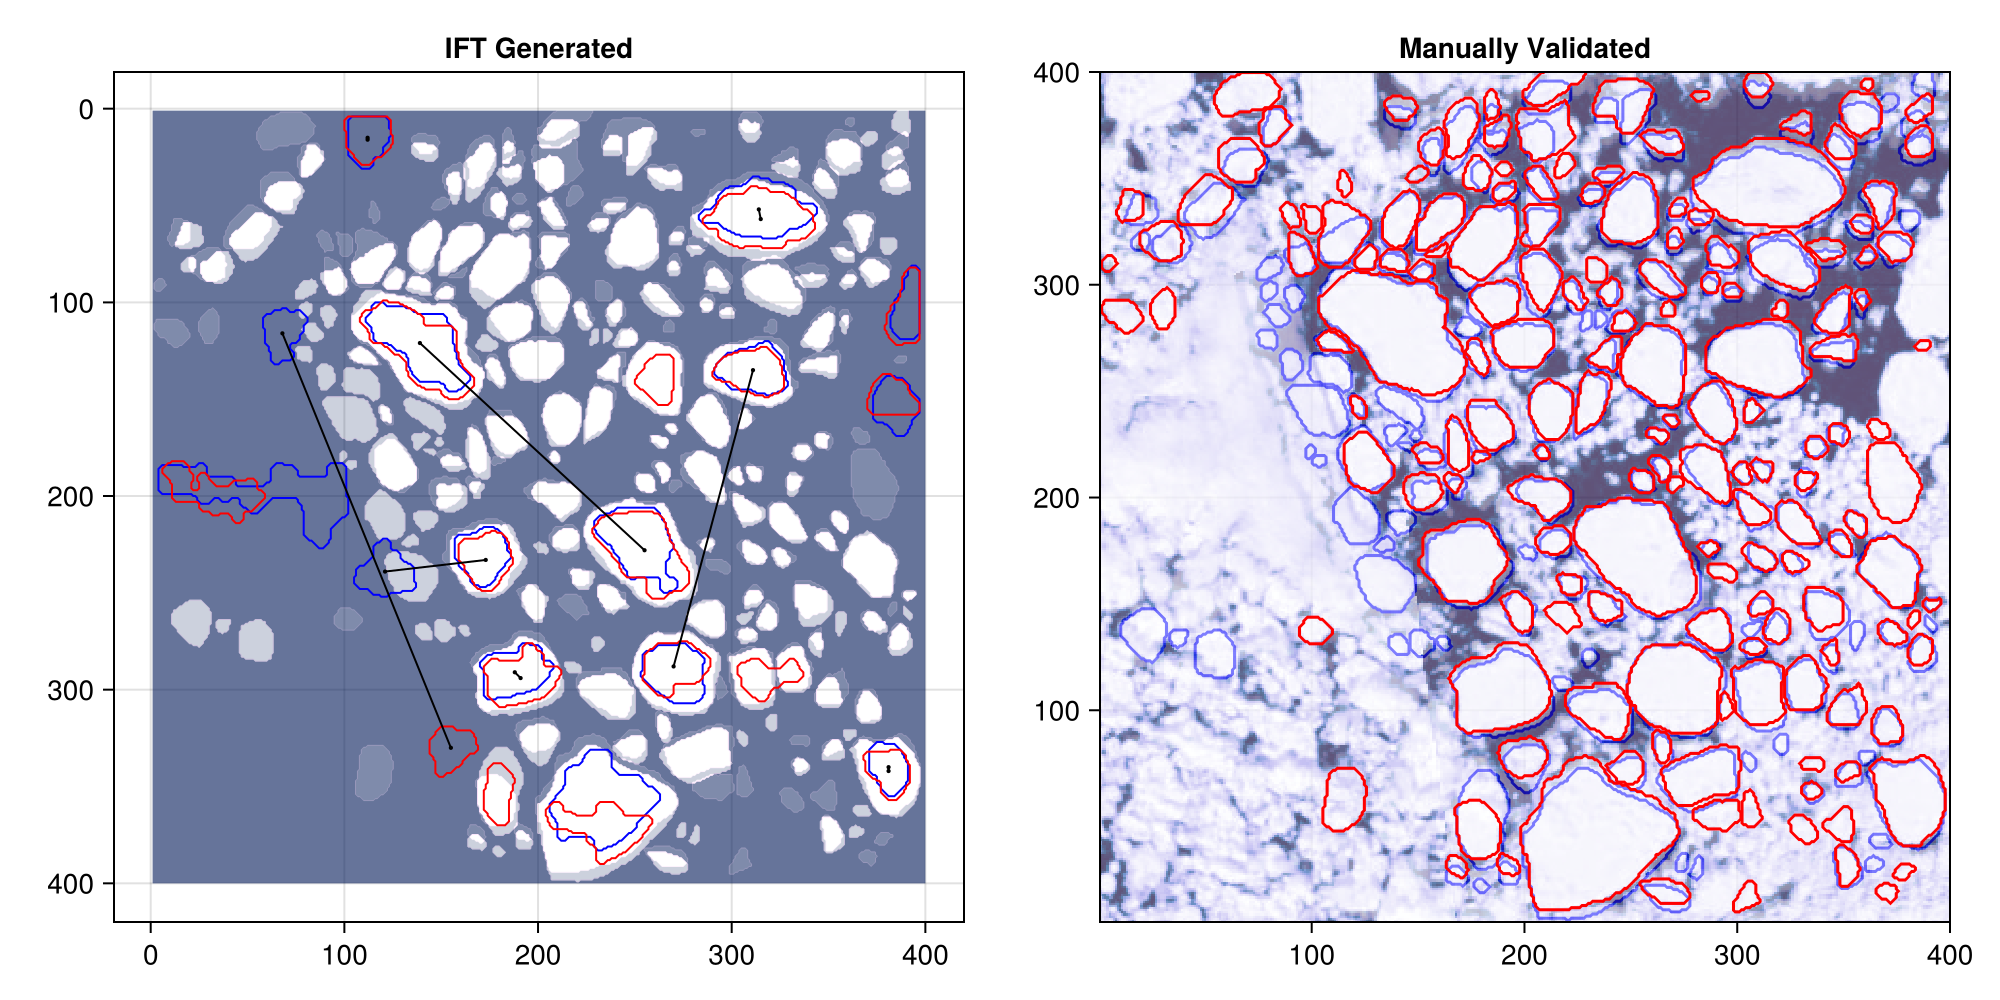

CairoMakie.Screen{IMAGE}


In [371]:
# Grab a case to plot. In this case aqua is case 2, that won't always be the case, so 
# check each time.
cases = [x for x in dataset3.data]
terra = cases[1]
aqua = cases[2];

# color options: https://docs.makie.org/dev/explanations/colors

# Initialize figure object
f = Figure(size=(1000, 500))

# Add two panels and give them titles
ax1 = CairoMakie.Axis(f[1, 1], aspect = 1, title="IFT Generated")
ax2 = CairoMakie.Axis(f[1, 2], aspect = 1, title="Manually Validated")
   
#IFT generated tracked image
idx = track_results.trajectory_uuid[1]
track_data = filter(r -> r.trajectory_uuid == idx, track_results);

ax1.yreversed = true
floes = terra.validated_binary_floes .> 0
CairoMakie.contourf!(ax1, rotr90(reverse(floes, dims=1)), levels = 0:0.5:1, colormap=(:batlow, 0.5))   
floes = aqua.validated_binary_floes .> 0
CairoMakie.contourf!(ax1, rotr90(reverse(floes, dims=1)), levels = 0:0.5:1, colormap=(:batlow, 0.2))   
for (props_df, color) in zip(props, [:blue, :red])
    for floe_data in eachrow(props_df)
        floe = floe_data.bdry
        rc = floe_data.min_row - 1
        cc = floe_data.min_col - 1
        lines!(ax1, getindex.(floe[1], 2) .+ cc, getindex.(floe[1], 1) .+ rc, color=color, linewidth=1)
    end
end
for traj_id in unique(track_results.trajectory_uuid)
    traj_data = filter(r -> r.trajectory_uuid == traj_id, track_results);
    scatterlines!(ax1, traj_data.col_centroid, traj_data.row_centroid, marker=:circle, markersize=3, color=:black, linewidth=1)
end
CairoMakie.ylims!(400, 0.5)
CairoMakie.xlims!(0.5, 400)

# Plot the Terra data. First, we get the binary floes as a bitmatrix
floes = terra.validated_binary_floes .> 0

# Then we plot the image using the "heatmap" function. Here I'm using Band 2 which has
# high contrast between water and ice.
CairoMakie.heatmap!(ax2, rotr90(green.(terra.modis_falsecolor)), 
        colormap=(:devon, 0.5), colorrange=(0, 1))

# Now we draw the Terra floe outlines using a contour plot. This method draws lines at
# places where the image gradient is large. In a binary image, it's all 0 or 1, so using
# levels = 0, 0.5, 1 forces it to draw lines along the edges of bright spots.
CairoMakie.contour!(ax2, rotr90(floes), color = :blue, levels = 0:0.5:1)   

# Now do the same for the Aqua images
floes = aqua.validated_binary_floes .> 0
CairoMakie.heatmap!(ax2, rotr90(green.(aqua.modis_falsecolor)),  
        colormap=(:devon, 0.5), colorrange=(0, 1))
CairoMakie.contour!(ax2, rotr90(floes), color = :red, levels = 0:0.5:1)

ax2.yreversed = false

# Finally we show the figure.
# We could also save it with the command save("image_name.png", f)
display(f)